## Spam Classifier using Naive Bayes Algorithm

### Import Libraries

In [1]:
import pandas as pd
import numpy as np

### Import Data

In [2]:
df = pd.read_csv('dataset/emails.csv')
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [3]:
df['text'][0]

"Subject: naturally irresistible your corporate identity  lt is really hard to recollect a company : the  market is full of suqgestions and the information isoverwhelminq ; but a good  catchy logo , stylish statlonery and outstanding website  will make the task much easier .  we do not promise that havinq ordered a iogo your  company will automaticaily become a world ieader : it isguite ciear that  without good products , effective business organization and practicable aim it  will be hotat nowadays market ; but we do promise that your marketing efforts  will become much more effective . here is the list of clear  benefits : creativeness : hand - made , original logos , specially done  to reflect your distinctive company image . convenience : logo and stationery  are provided in all formats ; easy - to - use content management system letsyou  change your website content and even its structure . promptness : you  will see logo drafts within three business days . affordability : your  ma

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [5]:
df['spam'].value_counts()

0    4360
1    1368
Name: spam, dtype: int64

In [9]:
print(f'% of Ham : {df["spam"].value_counts()[1]/len(df)*100}%')
print(f'% of Spam : {df["spam"].value_counts()[0]/len(df)*100}%')

% of Ham : 23.88268156424581%
% of Spam : 76.11731843575419%


In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

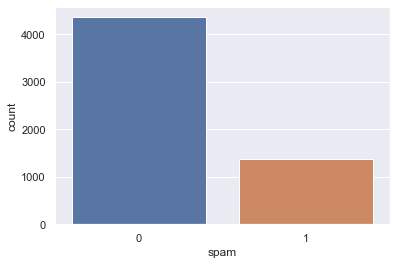

In [12]:
sns.countplot(df['spam']);

#### Count Vector / Text Featurization

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

sample = ['This is the first document.',
          'This is the second document.',
          'And this is the third one.',
          'Is this the fourth document or is it some other number?']

sample

['This is the first document.',
 'This is the second document.',
 'And this is the third one.',
 'Is this the fourth document or is it some other number?']

In [22]:
vect = CountVectorizer()

X = vect.fit_transform(sample)

X

<4x15 sparse matrix of type '<class 'numpy.int64'>'
	with 26 stored elements in Compressed Sparse Row format>

In [23]:
type(X)

scipy.sparse.csr.csr_matrix

In [24]:
X.toarray()

array([[0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1],
       [0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1],
       [1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1],
       [0, 1, 0, 1, 2, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1]])

In [25]:
vect.get_feature_names()

['and',
 'document',
 'first',
 'fourth',
 'is',
 'it',
 'number',
 'one',
 'or',
 'other',
 'second',
 'some',
 'the',
 'third',
 'this']

***This is the first document.***

[0,1,1,0,1,0,0,0,0,0,0,0,1,0,1]

[0,1,1,0,1,0,0,0,0,0,0,0,1,0,1]

## Challenge 1

#### 1. Create and code an algorithm of Countvectorizer from scratch. i.e. not using any existing library.

#### 2. Create a pull request in https://github.com/pksvv/MLclassify. If you don't know what is pull request then study it and then also read about how to create pull request.

#### 3. Make it as efficient as possible in terms of time complexity and space complexity.

In [27]:
spam_cv = vect.fit_transform(df['text'])

In [28]:
spam_cv

<5728x37303 sparse matrix of type '<class 'numpy.int64'>'
	with 708380 stored elements in Compressed Sparse Row format>

#### Train algo on dataset

In [30]:
from sklearn.naive_bayes import MultinomialNB
nbClx = MultinomialNB()

labels = df['spam'].values

In [31]:
nbClx.fit(spam_cv,labels)

MultinomialNB()

In [33]:
test = ['Fast Money !', # spam
        'Earn Quick Dollars and Be Rich Fast', # spam
        'I am really interested in your profile and would like to offer you a job of Director with Citibank.', # ham
        'Blackjack $17328492'] # spam

test

['Fast Money !',
 'Earn Quick Dollars and Be Rich Fast',
 'I am really interested in your profile and would like to offer you a job of Director with Citibank.',
 'Blackjack $17328492']

In [34]:
test = vect.transform(test)
test

<4x37303 sparse matrix of type '<class 'numpy.int64'>'
	with 27 stored elements in Compressed Sparse Row format>

In [36]:
test_pred = nbClx.predict(test)
test_pred

array([1, 1, 0, 1])

#### Training by splitting

In [37]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(spam_cv,labels,test_size=0.2,random_state=42)

In [38]:
nbClx2 = MultinomialNB()

nbClx2.fit(X_train,y_train)

MultinomialNB()

#### Evaluate model

In [41]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

y_pred_train = nbClx2.predict(X_train)

print(f'Accuracy Score :\n{accuracy_score(y_train,y_pred_train)}')
print(f'\n\nConfusion Matrix :\n{confusion_matrix(y_train,y_pred_train)}')
print(f'\n\nClassification Report :\n{classification_report(y_train,y_pred_train)}')


Accuracy Score :
0.9975993016150153


Confusion Matrix :
[[3494   10]
 [   1 1077]]


Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3504
           1       0.99      1.00      0.99      1078

    accuracy                           1.00      4582
   macro avg       1.00      1.00      1.00      4582
weighted avg       1.00      1.00      1.00      4582



In [42]:
y_pred_test = nbClx2.predict(X_test)

print(f'Accuracy Score :\n{accuracy_score(y_test,y_pred_test)}')
print(f'\n\nConfusion Matrix :\n{confusion_matrix(y_test,y_pred_test)}')
print(f'\n\nClassification Report :\n{classification_report(y_test,y_pred_test)}')

Accuracy Score :
0.9912739965095986


Confusion Matrix :
[[848   8]
 [  2 288]]


Classification Report :
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       856
           1       0.97      0.99      0.98       290

    accuracy                           0.99      1146
   macro avg       0.99      0.99      0.99      1146
weighted avg       0.99      0.99      0.99      1146



### Congratulations you have been able to create a working spam classifier. May be you can try applying it on emails in your inbox.

* **Gaussian** : It is used in classification and it assumes that features follow a normal distribution.

* **Multinomial** : It is used for discrete counts. For example, let’s say,  we have a text classification problem. Here we can consider Bernoulli trials which is one step further and instead of “word occurring in the document”, we have “count how often word occurs in the document”, you can think of it as “number of times outcome number x_i is observed over the n trials”.

* **Bernoulli** : The binomial model is useful if your feature vectors are binary (i.e. zeros and ones). One application would be text classification with ‘bag of words’ model where the 1s & 0s are “word occurs in the document” and “word does not occur in the document” respectively.

# Great Job !